# Viral Data Analysis

> Projects questions:

1.   Which county has the highest new cases per million in October
2.   What is the correlation between people older than 65 and total deaths
3.   Can we predict which county will have the highest covid cases ?

## Load the data

In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt

Download the data to cache locally. Do this once (a day), and comment out, not to DoS the server. (adopted from https://stackoverflow.com/a/35997720).

In [2]:
import requests
fname = 'owid-covid-data.csv'
url = 'https://covid.ourworldindata.org/data/' + fname
r = requests.get(url)
open(fname, 'wb').write(r.content)

11454574

Load the file to Pandas.

In [3]:
#url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# download the file locally when developing, not to DoS the server:
url = "owid-covid-data.csv" 
df = pd.read_csv(url, parse_dates=[3])

Check the columns available.

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

The columns are explained [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv). 

Check the "freshness" of the data.

In [ ]:
df.date.max()

Timestamp('2020-10-22 00:00:00')

All the different country codes:

In [ ]:
df.iso_code.unique()

array(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM',
       'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BES', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL',
       'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL',
       'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI',
       'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK',
       'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESH', 'ESP', 'EST', 'ETH',
       'FIN', 'FJI', 'FLK', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY',
       'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL',
       'GTM', 'GUM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN',
       'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM',
       'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KNA', 'KOR',
       'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO',
       'LTU', 'LUX', 'LVA', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX',
       'MKD', 'MLI',

Column info.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51798 entries, 0 to 51797
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         51501 non-null  object        
 1   continent                        51204 non-null  object        
 2   location                         51798 non-null  object        
 3   date                             51798 non-null  datetime64[ns]
 4   total_cases                      48191 non-null  float64       
 5   new_cases                        50916 non-null  float64       
 6   new_cases_smoothed               50128 non-null  float64       
 7   total_deaths                     39366 non-null  float64       
 8   new_deaths                       50916 non-null  float64       
 9   new_deaths_smoothed              50128 non-null  float64       
 10  total_cases_per_million          47930 non-null  float64  

In [ ]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.776400e+04,50491.000000,49704.000000,3.898000e+04,50491.000000,49704.000000,47505.000000,50427.000000,49639.000000,38736.000000,50427.000000,49639.000000,1.932800e+04,1.967900e+04,19679.000000,19328.000000,2.170400e+04,21704.000000,19997.000000,20335.000000,42748.000000,5.109900e+04,48739.000000,45786.000000,45101.000000,45548.000000,45183.000000,30137.000000,45766.000000,47417.000000,35730.000000,35273.000000,21547.000000,41284.000000,50448.000000,44175.000000
mean,1.329494e+05,1603.144323,1584.667526,6.054137e+03,44.335347,44.433810,2446.759870,29.061671,28.337590,84.253851,0.586546,0.583710,2.498627e+04,1.822427e+06,63.884158,0.802458,2.417559e+04,0.785796,191.968635,0.066792,56.979624,8.710317e+07,361.610925,31.260995,9.221162,5.829627,20776.611135,12.258984,251.922591,8.053385,10.780057,32.637157,52.300497,3.100584,73.984687,0.723675
std,1.331521e+06,14439.062869,14179.965367,4.900451e+04,370.496009,360.509934,4849.664589,103.418016,70.316223,168.475682,2.948014,1.868564,1.034436e+05,8.404629e+06,128.404475,1.508543,9.558351e+04,1.369417,916.893512,0.093082,26.817463,6.076292e+08,1650.058841,9.033895,6.307114,4.304584,20375.915132,19.315657,117.408280,4.153622,10.474303,13.434161,31.622788,2.520864,7.384698,0.153019
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,-67.901000,-9.678000,-3.743000e+03,1.000000e+00,0.000000,-0.398000,0.000000e+00,0.000000,1.324000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.410000e+02,0.000000,0.714000,1.100000e+01,0.000000,0.000000,70.179000,0.000000,0.194000,3.318000,0.000000,0.000000,1.000750e+03,5.244050e+04,3.225500,0.066000,1.081000e+03,0.068000,11.281000,0.009000,38.890000,1.399491e+06,37.728000,23.300000,3.552000,2.085000,5338.454000,0.500000,155.898000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,1.666500e+03,12.000000,17.000000,7.000000e+01,0.000000,0.286000,465.734000,1.817000,3.360000,17.163500,0.000000,0.024000,3.446500e+03,2.238940e+05,16.486000,0.302000,3.828000e+03,0.316000,32.095000,0.030000,62.040000,8.278737e+06,88.125000,31.100000,6.981000,4.393000,14048.881000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.400000,0.754000
75%,1.665325e+04,190.000000,197.892750,6.060000e+02,3.000000,3.429000,2698.176000,20.949000,23.622000,69.314000,0.235000,0.336000,1.255825e+04,8.944525e+05,68.906500,0.927000,1.350000e+04,0.934000,104.201000,0.087000,78.700000,2.982597e+07,214.243000,39.700000,14.762000,9.473000,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,4.047250e+07,400350.000000,364659.143000,1.119283e+06,10468.000000,7459.143000,46890.571000,8652.658000,2472.188000,1237.551000,215.382000,63.140000,1.492409e+06,1.600000e+08,1509.435000,25.955000,1.169107e+06,19.092000,45864.000000,0.755000,100.000000,7.794799e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [ ]:
#df.iso_code.value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(10,40))
#df.groupby(level=[0]).size().sort_values(ascending=True).plot(kind='barh', figsize=(10,40))

Create a new DataFrame with only the last row for each country, set iso_code as index

In [ ]:
dfl = df.groupby('iso_code').last()
# equivalent:
#dfl = df.groupby('iso_code').tail(1).set_index('iso_code') 
dfl

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABW,North America,Aruba,2020-10-22,4369.0,14.0,16.286,35.0,1.0,0.429,40921.267,131.128,152.537,327.820,9.366,4.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.46,106766.0,584.800,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
AFG,Asia,Afghanistan,2020-10-22,40510.0,135.0,69.143,1501.0,2.0,2.857,1040.630,3.468,1.776,38.558,0.051,0.073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.00,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
AGO,Africa,Angola,2020-10-22,8049.0,220.0,195.571,251.0,3.0,4.143,244.902,6.694,5.951,7.637,0.091,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.30,32866268.0,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
AIA,North America,Anguilla,2020-10-22,3.0,0.0,0.000,NaN,0.0,0.000,199.973,0.000,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.07,15002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88,NaN
ALB,Europe,Albania,2020-10-22,17948.0,297.0,284.714,462.0,4.0,4.000,6236.709,103.204,98.935,160.539,1.390,1.390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.19,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,Asia,Vietnam,2020-10-22,1145.0,4.0,3.286,35.0,0.0,0.000,11.763,0.041,0.034,0.360,0.000,0.000,1260799.0,3009.0,12.953,0.031,2394.0,0.025,728.609,0.001,samples tested,51.85,97338583.0,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.694
YEM,Asia,Yemen,2020-10-22,2061.0,1.0,0.571,599.0,0.0,0.286,69.101,0.034,0.019,20.083,0.000,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.37,29825968.0,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.452
ZAF,Africa,South Africa,2020-10-22,708359.0,2055.0,1706.429,18741.0,85.0,84.286,11943.595,34.649,28.772,315.991,1.433,1.421,4581346.0,15366.0,77.246,0.259,21056.0,0.355,11.530,0.087,people tested,39.81,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.380,5.52,8.1,33.2,43.993,2.32,64.13,0.699


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51394 entries, 0 to 51393
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         51099 non-null  object        
 1   continent                        50804 non-null  object        
 2   location                         51394 non-null  object        
 3   date                             51394 non-null  datetime64[ns]
 4   total_cases                      47764 non-null  float64       
 5   new_cases                        50491 non-null  float64       
 6   new_cases_smoothed               49704 non-null  float64       
 7   total_deaths                     38980 non-null  float64       
 8   new_deaths                       50491 non-null  float64       
 9   new_deaths_smoothed              49704 non-null  float64       
 10  total_cases_per_million          47505 non-null  float64  

In [5]:
newTable = df.copy();
newTable = newTable.sort_values(by=['total_cases'], ascending=False)
sortedTable = newTable[newTable.iso_code != 'OWID_WRL']
sortedTable.head(10)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
48682,USA,North America,United States,2020-10-23,8408340.0,72058.0,61207.857,223042.0,841.0,763.143,25402.637,217.696,184.917,673.838,2.541,2.306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48681,USA,North America,United States,2020-10-22,8336282.0,62978.0,60026.000,222201.0,1135.0,761.286,25184.941,190.264,181.346,671.297,3.429,2.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48680,USA,North America,United States,2020-10-21,8273304.0,58549.0,59512.857,221066.0,933.0,737.714,24994.676,176.884,179.796,667.868,2.819,2.229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48679,USA,North America,United States,2020-10-20,8214755.0,60160.0,58651.143,220133.0,459.0,721.143,24817.792,181.751,177.192,665.049,1.387,2.179,137574678.0,739349.0,415.630,2.234,916313.0,2.768,15.623,0.064,tests performed,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48678,USA,North America,United States,2020-10-19,8154595.0,47843.0,56007.286,219674.0,385.0,700.429,24636.042,144.540,169.205,663.662,1.163,2.116,136835329.0,640675.0,413.396,1.936,959676.0,2.899,17.135,0.058,tests performed,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48677,USA,North America,United States,2020-10-18,8106752.0,56611.0,55400.714,219289.0,690.0,701.714,24491.502,171.029,167.372,662.499,2.085,2.120,136194654.0,649710.0,411.461,1.963,987176.0,2.982,17.819,0.056,tests performed,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48676,USA,North America,United States,2020-10-17,8050141.0,70256.0,55066.429,218599.0,899.0,687.429,24320.473,212.252,166.363,660.415,2.716,2.077,135544944.0,908841.0,409.498,2.746,1006382.0,3.040,18.276,0.055,tests performed,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48675,USA,North America,United States,2020-10-16,7979885.0,63785.0,53327.286,217700.0,828.0,703.857,24108.221,192.702,161.108,657.699,2.501,2.126,134636103.0,1175236.0,406.752,3.551,1028884.0,3.108,19.294,0.052,tests performed,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48674,USA,North America,United States,2020-10-15,7916100.0,59386.0,52329.429,216872.0,970.0,724.429,23915.519,179.412,158.094,655.197,2.930,2.189,133460867.0,1157343.0,403.202,3.496,1049449.0,3.171,20.055,0.050,tests performed,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48673,USA,North America,United States,2020-10-14,7856714.0,52517.0,50728.857,215902.0,817.0,713.286,23736.106,158.660,153.258,652.267,2.468,2.155,132303524.0,1143037.0,399.705,3.453,1072245.0,3.239,21.137,0.047,tests performed,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924


## 1. Which county has the highest new cases ?

In order to get the most infected country we do as follows:


1.   Copy the whole table
2.   Sort the new table by "total_cases", so this way we get the most infected countries at the top
3.   Then we remove the "OWID_WRL", because we want a specific countrie and not the overall world
4.   We take the first from the top.



In [7]:
newTable = df.copy();
newTable = newTable.sort_values(by=['total_cases'], ascending=False)
sortedTable = newTable[newTable.iso_code != 'OWID_WRL']
sortedTable.head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
48682,USA,North America,United States,2020-10-23,8408340.0,72058.0,61207.857,223042.0,841.0,763.143,25402.637,217.696,184.917,673.838,2.541,2.306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924


So as we can see, United States has the highest number in "total_cases".

##2. What is the correlation between people older than 65 and total deaths

First of all, I copy the main table, then I remove rows where iso_code is "OWID_WRL", Then I take only the collums that I need ('iso_code', 'aged_65_older','total_deaths'). Then in order to get total numbers for each iso_code, I sum the rows, that way I get one row for each iso_code. Then I remove rows that are not relevent, sort the remaining table data by "total_deaths" and remove top 10, because the first 10 have extremely big numbers that can afect the correlation graph clarity.

In [8]:
secondTaskTable = df.copy()
secondTaskTable = secondTaskTable[secondTaskTable.iso_code != 'OWID_WRL']
secondTaskTable = secondTaskTable[['iso_code', 'aged_65_older','total_deaths']]
secondTaskTable = secondTaskTable.groupby(by=['iso_code']).sum()
secondTaskTable = secondTaskTable.drop(secondTaskTable[secondTaskTable.aged_65_older <= 0].index)
secondTaskTable = secondTaskTable.drop(secondTaskTable[secondTaskTable.total_deaths <= 0].index)
secondTaskTable = secondTaskTable.sort_values(by=['total_deaths'], ascending=False)
secondTaskTable.drop(secondTaskTable.index[:10], inplace=True)
secondTaskTable.head(10)



,aged_65_older,total_deaths
iso_code,,
RUS,4225.044,2230766.0
COL,1781.518,2053608.0
BEL,5497.016,1829962.0
DEU,6392.994,1680261.0
CAN,5061.232,1494812.0
ZAF,1389.440,1432414.0
CHL,2583.271,1338769.0
ARG,2609.134,1186718.0
NLD,5596.142,1169745.0


Then I save column data to different lists.

In [27]:
xxx = secondTaskTable.aged_65_older
yyy = secondTaskTable.total_deaths
#xxx = xxx.drop(yyy[yyy <= 1000].index)
#yyy = yyy.drop(yyy[yyy <= 1000].index)

Setup the figure, plot the xxx and yyy values, and I fit the linear function and then plot the data.

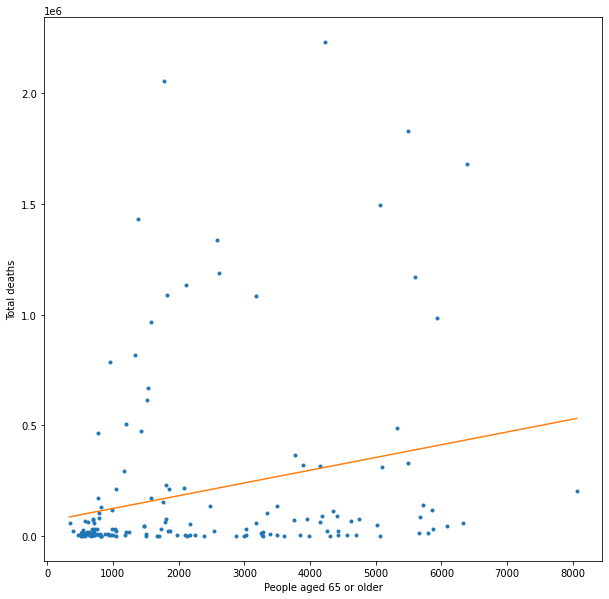

In [28]:
plt.figure(figsize=(10,10))
plt.xlabel('People aged 65 or older')
plt.ylabel('Total deaths')
plt.plot(xxx, yyy, '.')

w1, w0 = ma.polyfit(ma.masked_invalid(xxx), ma.masked_invalid(yyy), 1)
x_all = np.linspace(xxx.min(), xxx.max(), len(xxx))
#x_all = np.linspace(xxx.min(), 100000, len(xxx))
plt.plot(x_all, w0 + w1 * x_all, '-')



In [29]:
ma.corrcoef(ma.masked_invalid(xxx), ma.masked_invalid(yyy))[0,1]

0.24716027267510504

As we can see, the correlation coefficient is around 0.25, so there is some correlation but its not super big. In most cases the number of deaths increases steadily, and in some it increases exponentially. So to sum up, I would say that the correlation is weak.

##3. Can we predict which county will have the highest covid cases ?

Importing modules that will be used for this problem

In [52]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR


Copy the main table, filter the table to that only the USA be left and dropping the values that are not a number (NaN).

In [53]:
thirdTaskTable = df
thirdTaskTable = thirdTaskTable.loc[thirdTaskTable['iso_code']=='USA']
thirdTaskTable = thirdTaskTable.drop(thirdTaskTable[np.isnan(thirdTaskTable.total_cases)].index)


Then saving total cases values to y list and for x, we create a list that goes from 0 to the length of y list.

In [54]:
y = thirdTaskTable.total_cases
x = list(range(0, len(y)))

Tehen we have to create a vectorized list out of x list. So we create new array and append all the valies as vectors.

In [55]:
x_values = []
for i in range(0, len(x)):
  x_values.append([x[i]])

y


48406          1.0
48407          1.0
48408          1.0
48409          1.0
48410          2.0
           ...    
48678    8154595.0
48679    8214755.0
48680    8273304.0
48681    8336282.0
48682    8408340.0
Name: total_cases, Length: 277, dtype: float64

Then we create linear and poly models.

In [56]:
linearModel = SVR(kernel='linear', C=1000, gamma=0.1)

In [40]:
polyModel = SVR(kernel='poly', C=10, gamma=0.1, epsilon=0.1, coef0 = 1, degree=3)

And fit the values on created models

In [57]:
linearModel.fit(x_values, y)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [42]:
polyModel.fit(x_values, y)

SVR(C=10, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma=0.1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Predicting values using linear model

In [61]:
linearModel_predicted_x = []
linearModel_predicted_y = []
predicted_value = 0
for i in range(0, max(x)+100):
  predicted_value = linearModel.predict([[i]])
  if predicted_value > 0:
    linearModel_predicted_y.append(predicted_value)
    linearModel_predicted_x.append(i)

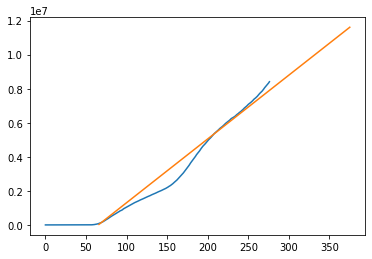

In [62]:
#predicted_y

plt.plot(x, y, linearModel_predicted_x, linearModel_predicted_y, '-')

Predicting values using Poly model

In [63]:
polyModel_predicted_x = []
polyModel_predicted_y = []
predicted_value = 0
for i in range(0, max(x)+100):
  predicted_value = polyModel.predict([[i]])
  if predicted_value > 0:
    polyModel_predicted_y.append(predicted_value)
    polyModel_predicted_x.append(i)

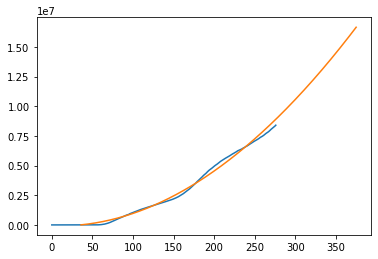

In [65]:
predicted_y

plt.plot(x, y, polyModel_predicted_x, polyModel_predicted_y, '-')